In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [17]:
import seaborn as sns

In [18]:
df = sns.load_dataset('iris')

In [19]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values
print(X.shape,y.shape)

(150, 2) (150,)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfmodel = RandomForestClassifier(n_estimators = 5)
rfmodel.fit(X_train,y_train).score(X_test,y_test)

1.0

In [24]:
rfmodel.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1053711615),
 DecisionTreeClassifier(max_features='sqrt', random_state=685465346),
 DecisionTreeClassifier(max_features='sqrt', random_state=1006085922),
 DecisionTreeClassifier(max_features='sqrt', random_state=1938864277),
 DecisionTreeClassifier(max_features='sqrt', random_state=1366516996)]

In [26]:
from sklearn import tree

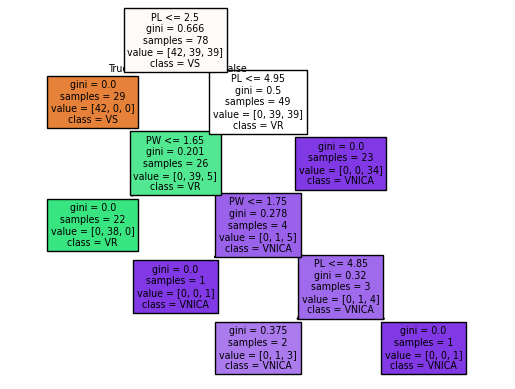

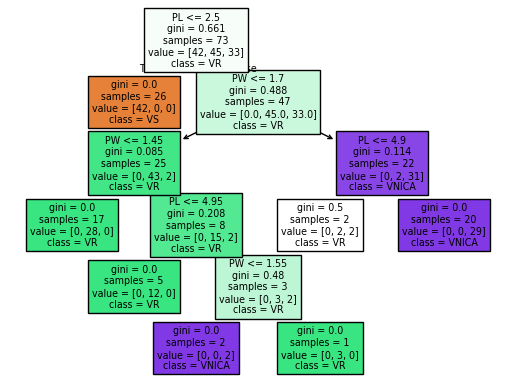

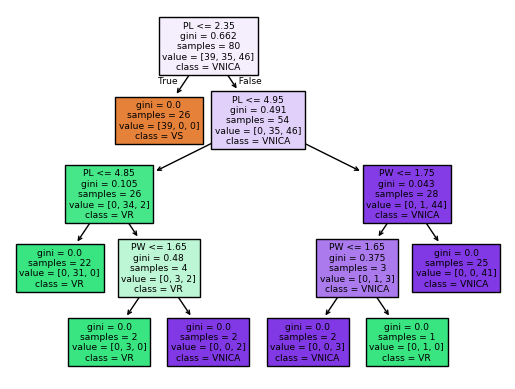

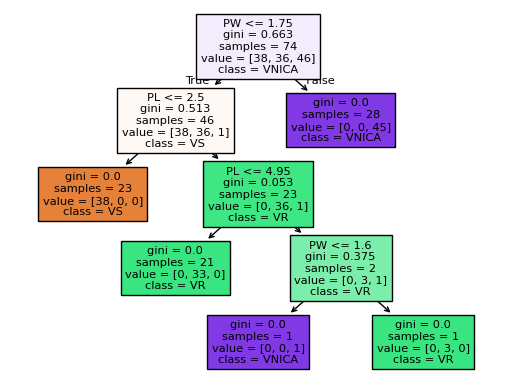

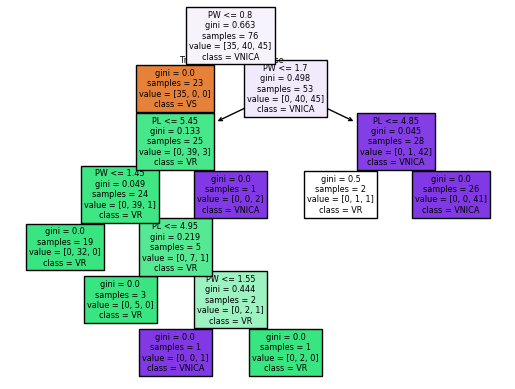

In [27]:
fn =  ['PL','PW']             
cn = ['VS','VR','VNICA']
for i in range(5):
    tree.plot_tree(rfmodel.estimators_[i],filled= True, feature_names = fn , class_names=cn)
    plt.show()

In [28]:
params = {'criterion':['gini','entropy'],
            'n_estimators':[5,10,50,100],
            'max_depth':[2,4,8]}
print(params)

{'criterion': ['gini', 'entropy'], 'n_estimators': [5, 10, 50, 100], 'max_depth': [2, 4, 8]}


In [29]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid_model=GridSearchCV(rfmodel, params)
grid_model.fit(X_train,y_train)
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 10}

In [36]:
finalmodel = RandomForestClassifier(n_estimators=50,max_depth=2)
finalmodel.fit(X_train,y_train).score(X_test,y_test)

0.9666666666666667

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
accuracies= cross_val_score(finalmodel,X_train,y_train,cv=5)
print(accuracies)
print("Average Accuracy =",np.mean(accuracies))

[0.91666667 0.91666667 1.         0.95833333 0.91666667]
Average Accuracy = 0.9416666666666667


In [42]:
accuracies= cross_val_score(finalmodel,X,y,cv=5)
print(accuracies)
print("Average Accuracy =",np.mean(accuracies))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
Average Accuracy = 0.9600000000000002
